In [1]:
import numpy as np

parameters:
- n_p - number of members of party in power
- n_o - number of members of party in opposition
- n is the total
- m number of bills

In [2]:
n_p=210;
n_o=200;
n=n_p+n_o;
m=800;

bills are of 4 types:
- nonpartisan assigned with prob pr_nonpart
- partisan, policy - only party in power wants them (pr_pol is the frewuency of those, among the partisan ones)
- partisan, operational, pr_opp: both parties 
- partisan, trolling, pr_troll: only opposition wants it

In [3]:
pr_nonpart=0;
pr_pol=.5;
pr_opp=.23;
pr_troll=0;
a=np.zeros([n,m]);
avg=np.zeros([n,m]);

produce a voting record for one bill:

In [4]:
def bill(pr_p,pr_po,pr_op,pr_tr,b_p,b_o,p_sl):
    b=np.zeros([b_p+b_o]);
    if np.random.rand(1)<pr_nonpart:
        for k in range(b_p+b_o):
            #b[k]=2*np.random.randint(0,2) -1;
            b[k]=2*int(np.random.binomial(1,0.3))-1;
    else:
        dec = np.random.rand(1)
        if dec<pr_po:
            for k in np.arange(b_p):
                b[k]=2*int(np.random.binomial(1,0.98))-1;
            op_frac = np.random.rand(1)
            for k in np.arange(b_p+1,b_p+b_o):
                if k < b_p+op_frac*b_o:
                    b[k]=-1;
                else:
                    b[k]=1;
        elif dec<pr_po+pr_op:
            po_frac = 0.75+0.25*np.random.rand(1)
            for k in np.arange(b_p):
                if k<po_frac*b_p:
                    b[k]=1;
                else:
                    b[k]=-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*int(np.random.binomial(1,0.02))-1;
        elif dec<pr_po+pr_op+pr_tr:
            for k in np.arange(b_p):
                b[k]=2*int(np.random.binomial(1,0.02))-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*int(np.random.binomial(1,0.02))-1;
        else:
            for k in np.arange(b_p):
                b[k]=2*int(np.random.binomial(1,.02))-1
            op_frac = 0.75+0.25*np.random.rand(1)
            for k in np.arange(b_p+1, b_p+b_o):
                if k<b_p+op_frac*b_o:
                    b[k]=1;
                else:
                    b[k]=-1;
    return(b);

first check if it's nonpartisan: then vote for it with probability 50%

In [5]:
def bill_avg(pr_p,pr_po,pr_op,pr_tr,b_p,b_o,p_sl):
    b=np.zeros([b_p+b_o]);
    if np.random.rand(1)<pr_nonpart:
        for k in range(b_p+b_o):
            b[k]=0.3;
    else:
        if np.random.rand(1)<pr_po:
            for k in np.arange(b_p):
                b[k]=2*p_sl-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*(1-p_sl)-1;
        elif np.random.rand(1)<pr_op:
            for k in np.arange(b_p):
                b[k]=2*0.9-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*0.9-1;
        else:
            for k in np.arange(b_p):
                b[k]=2*(1-p_sl)-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*p_sl-1;
    return(b);

for policy bills, power party voteds with probability p_sl, opposition party woth prob 1-p_sl

for household bills, both parties vote for them with prob .7 (should be a parameter!)

else, if it's trolling bill, opposition votes for it w prob p_sl, power party 1-p_sl

produce m bills, and do svd

2
409


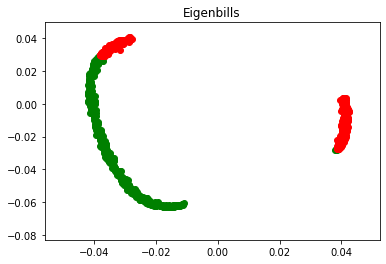

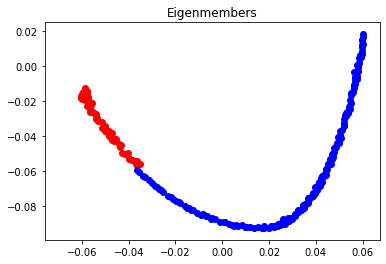

In [6]:
for l in range(m):
    a[:,l]=bill(pr_nonpart,pr_pol,pr_opp,pr_troll,n_p,n_o,.85);
    avg[:,l]=bill_avg(pr_nonpart,pr_pol,pr_opp,pr_troll,n_p,n_o,.85);

print(np.linalg.matrix_rank(avg))
print(np.linalg.matrix_rank(a))
[u,s,v]=np.linalg.svd(a);
import matplotlib.pyplot as plt

passed_indices = []
failed_indices = []
for i in range(m):
    if sum(a[:,i]) > 0:
        passed_indices.append(i)
    else:
        failed_indices.append(i)
plt.scatter(v[0,passed_indices], v[1,passed_indices], c='g')
plt.scatter(v[0,failed_indices], v[1,failed_indices], c='r')
plt.title('Eigenbills')
plt.show()
#plt.scatter(u[0,:n_p], u[1,:n_p], c='r')
#plt.scatter(u[0,n_p:], u[1,n_p:], c='b')
#plt.title('Eigenmembers')
#plt.show()
plt.scatter(u[:n_p,0], u[:n_p,1], c='r')
plt.scatter(u[n_p+1:,0], u[n_p+1:,1], c='b')
plt.title('Eigenmembers')
plt.show()

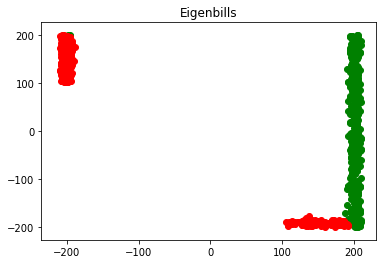

In [7]:
#[u,s,v]=np.linalg.svd(a);
v_t = np.zeros((2,m))
for i in range(m):
    v_t[0,i] = sum(a[:n_p,i])
    v_t[1,i] = sum(a[n_p+1:,i])

passed_indices = []
failed_indices = []
for i in range(m):
    if sum(a[:,i]) > 0:
        passed_indices.append(i)
    else:
        failed_indices.append(i)
plt.scatter(v_t[0,passed_indices], v_t[1,passed_indices], c='g')
plt.scatter(v_t[0,failed_indices], v_t[1,failed_indices], c='r')
plt.title('Eigenbills')
plt.show()


In [8]:
def std_vot_mat(a):
    a_sorted = np.copy(a)
    [u,s,v]=np.linalg.svd(a);
    a1 = 1;
    a2 = 0;
    b1 = 1;
    b2 = 0;
    mem_inds = sorted(range(u.shape[0]), key=lambda k: b1*u[k,0]+b2*u[k,1])
    bill_inds = sorted(range(v.shape[0]), key=lambda k: a1*v[0,k]+a2*v[1,k])
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            a_sorted[i,j] = a[mem_inds[i], bill_inds[j]]
    return a_sorted

a_sorted = std_vot_mat(a)

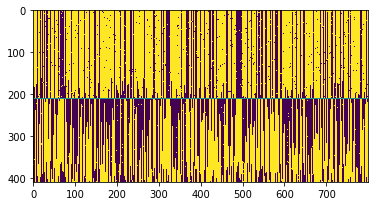

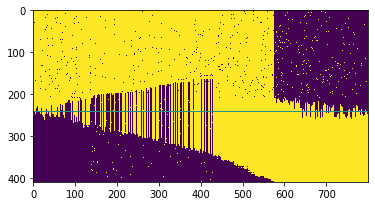

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
'''
mem_inds = sorted(range(len(mem)), key=lambda k: mem[k])
bill_inds = sorted(range(len(bill_params)), key=lambda k: 10*np.exp(bill_params[k][0])+0.1*bill_params[k][1])
a_sorted = np.copy(a)
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        a_sorted[i,j] = a[mem_inds[i], bill_inds[j]]
plt.imshow(a_sorted)
plt.show()
'''
plt.imshow(a)
plt.show()
plt.imshow(a_sorted)
plt.show()

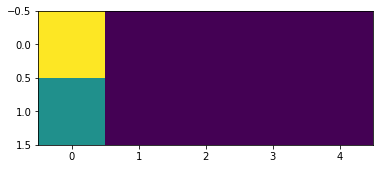

In [10]:
a = -1*np.ones((2,5))
a[0,0]=1
a[1,0]=0
plt.imshow(a)
plt.show()